# Compare Neural Network Performace

The focus of this notebook is on exploring the resulting models for the various data sets for different number of nodes for the hidden layer of the neuronal network.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib inline

In [2]:
key_list = ['total', 'H', 'DD', 'UD', 'pca3', 'pca10']
nodes_list = [50, 100, 150, 200, 250, 300]
df_dict = {}

for key in key_list:
    df_list = []
    for nodes in nodes_list:
        filepath = 'models/training_{}_{}.log'.format(key, nodes)
        df_list.append(pd.read_csv(filepath))
    
    df = pd.concat(df_list, axis=1, keys=nodes_list)
    df.columns = df.columns.swaplevel()
    df_dict[key] = df
    
df_dict['total']['loss'].head()

,50,100,150,200,250,300
0,3.095123,2.770260,2.525820,2.436354,2.339535,2.225815
1,2.359306,1.888540,1.622117,1.493953,1.367294,1.246781
2,2.076574,1.528226,1.274305,1.148748,1.027068,0.931775
3,1.866704,1.293359,1.078882,0.947758,0.851453,0.779807
4,1.719391,1.146497,0.946900,0.835519,0.751720,0.688741


## Accuracy and Loss during Training

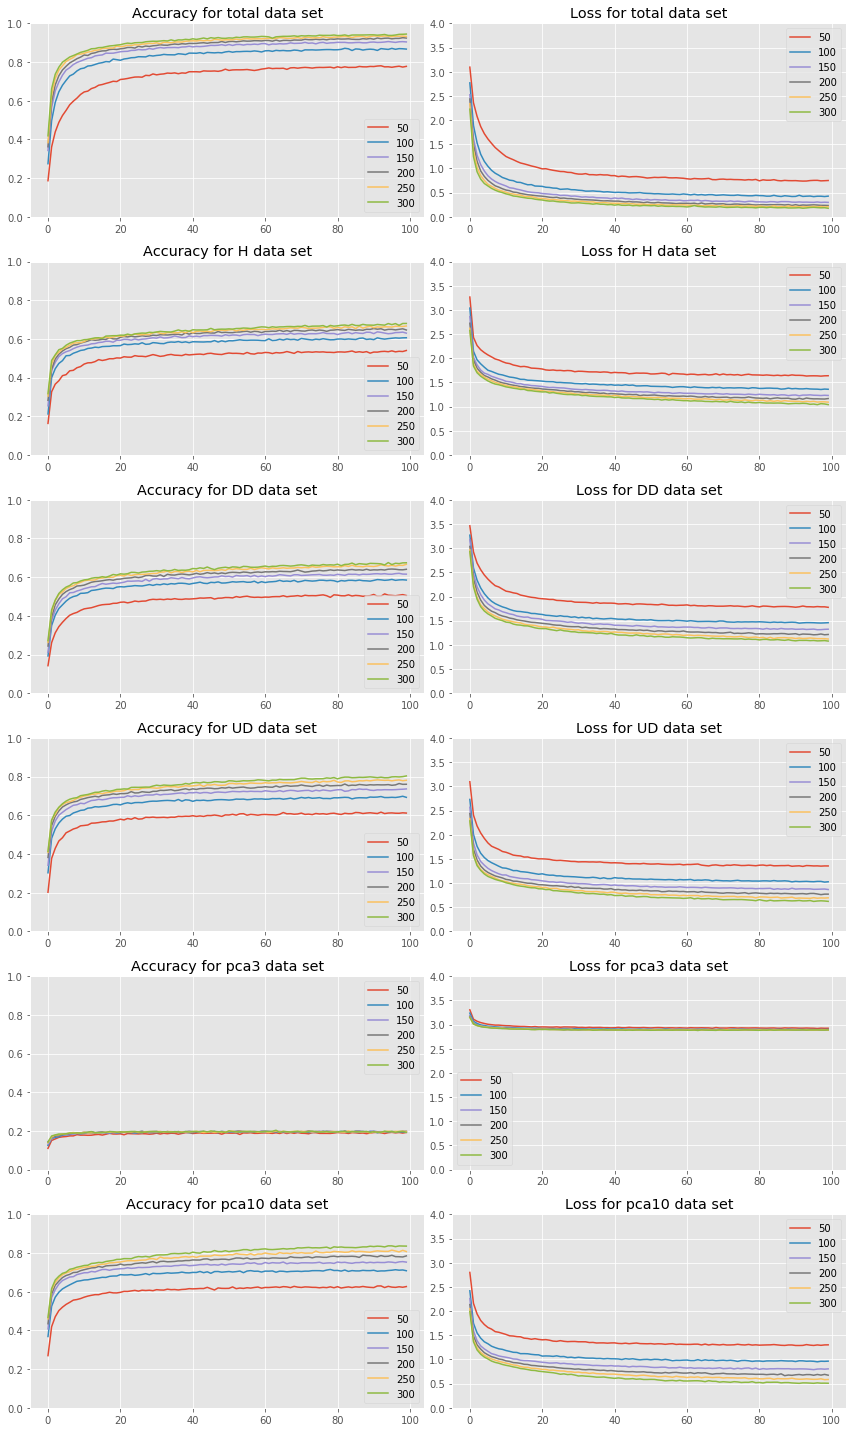

In [3]:
fig = plt.figure(figsize=(12, 20))
for i, key in enumerate(key_list):
    plt.subplot(len(key_list), 2, 2*i + 1)
    df_dict[key]['acc'].plot(
        title='Accuracy for {} data set'.format(key), ax=plt.gca());
    plt.ylim([0, 1])
    plt.subplot(len(key_list), 2, 2*i + 2)
    df_dict[key]['loss'].plot(
        title='Loss for {} data set'.format(key), ax=plt.gca());
    plt.ylim([0, 4])
plt.tight_layout()

## Get Final Accuracy for each Training

In [6]:
key_list = ['total', 'H', 'DD', 'UD', 'pca3', 'pca10']
nodes_list = [50, 100, 150, 200, 250, 300]

n_keys, n_nodes = len(key_list), len(nodes_list)
df = pd.DataFrame(np.empty((n_nodes, n_keys)) * np.nan,
                  index=nodes_list, columns=key_list)

for key in key_list:
    accuracy_values = []
    for nodes in nodes_list:
        filepath = 'models/training_{}_{}.log'.format(key, nodes)
        try:
            acc = pd.read_csv(filepath)['acc'].values[-1]
            df[key][nodes] = acc
        except Exception as e:
            print(e)
        finally:
            accuracy_values.append(None)

df

,total,H,DD,UD,pca3,pca10
50,0.777819,0.540380,0.505208,0.611826,0.192096,0.626900
100,0.867157,0.606250,0.585049,0.693137,0.193076,0.708701
150,0.904228,0.630086,0.615564,0.736703,0.197304,0.753248
200,0.924265,0.646446,0.640564,0.760846,0.197365,0.785355
250,0.932414,0.666912,0.666238,0.781434,0.197120,0.807966
300,0.944792,0.680270,0.674387,0.803738,0.192953,0.836029


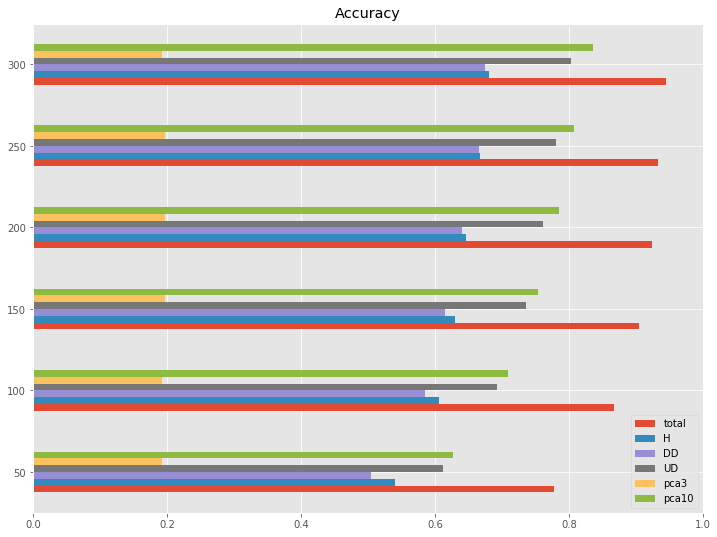

In [9]:
df.plot(kind='barh', figsize=(12, 9), title='Accuracy');
plt.xlim([0, 1]);